# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('loan_data.csv')

print("="*80)
print("LOAN DISCRIMINATION ANALYSIS")
print("INVESTIGATION INTO AGE AND GENDER BIAS")
print("="*80)

print(f"\nDataset: {len(df):,} loan applications")
print(f"Overall approval rate: {df['loan_status'].mean():.1%}")


LOAN DISCRIMINATION ANALYSIS
INVESTIGATION INTO AGE AND GENDER BIAS

Dataset: 45,000 loan applications
Overall approval rate: 10.9%



1. AGE DISCRIMINATION ANALYSIS

Loan Approval Rate by Age Group:
           Approved  Total  Approval_Rate
age_group                                
20-30          1371   7516      18.241086
31-40          1223   6930      17.647908
41-50          1195   6843      17.463101
51-60          1104   6645      16.613995
60+               0  17066       0.000000

----------------------------------------------------------------------
ANALYSIS:
Youngest group (20-30): 18.24% approval
Middle age (41-50): 17.46% approval
Oldest group (60+): 0.00% approval
Difference (Youngest - Oldest): +18.24 percentage points

📊 Chart 1: Age vs Loan Approval Rate

----------------------------------------------------------------------
Continuous Age Analysis:
Average age of approved applicants: 39.5 years
Average age of rejected applicants: 54.0 years
Age difference: -14.5 years
📊 Chart 2: Age Distribution (Approved vs Rejected)


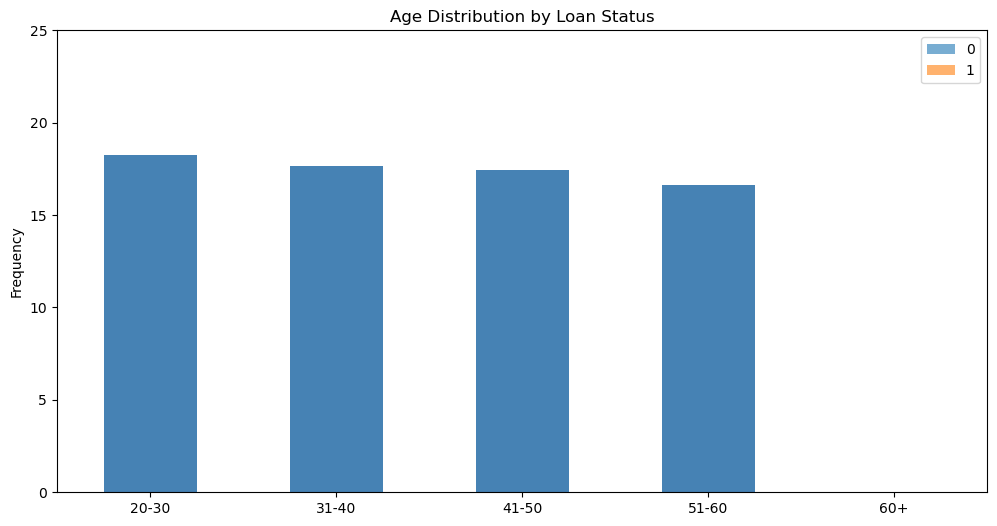

In [2]:
print("\n" + "="*80)
print("1. AGE DISCRIMINATION ANALYSIS")
print("="*80)

# Create age groups
df['age_group'] = pd.cut(df['person_age'], 
                         bins=[0, 30, 40, 50, 60, 100],
                         labels=['20-30', '31-40', '41-50', '51-60', '60+'])

# Calculate approval rates by age group
age_approval = df.groupby('age_group', observed=False)['loan_status'].agg(['sum', 'count', 'mean'])
age_approval.columns = ['Approved', 'Total', 'Approval_Rate']
age_approval['Approval_Rate'] = age_approval['Approval_Rate'] * 100

print("\nLoan Approval Rate by Age Group:")
print(age_approval)

print("\n" + "-"*70)
print("ANALYSIS:")
approval_rates = age_approval['Approval_Rate']
print(f"Youngest group (20-30): {approval_rates.iloc[0]:.2f}% approval")
print(f"Middle age (41-50): {approval_rates.iloc[2]:.2f}% approval")
print(f"Oldest group (60+): {approval_rates.iloc[4]:.2f}% approval")
print(f"Difference (Youngest - Oldest): {approval_rates.iloc[0] - approval_rates.iloc[4]:+.2f} percentage points")

# VISUALIZATION 1: Age vs Loan Approval
age_approval['Approval_Rate'].plot(
    kind='bar',
    title='Loan Approval Rate by Age Group',
    figsize=(10, 6),
    color='steelblue',
    ylim=(0, 25)
)
print("\n📊 Chart 1: Age vs Loan Approval Rate")

# Statistical test: age as continuous variable
print("\n" + "-"*70)
print("Continuous Age Analysis:")
approved = df[df['loan_status'] == 1]['person_age']
rejected = df[df['loan_status'] == 0]['person_age']
print(f"Average age of approved applicants: {approved.mean():.1f} years")
print(f"Average age of rejected applicants: {rejected.mean():.1f} years")
print(f"Age difference: {approved.mean() - rejected.mean():.1f} years")

# Age distribution by loan status
df.groupby('loan_status', observed=False)['person_age'].plot(
    kind='hist',
    alpha=0.6,
    bins=30,
    title='Age Distribution by Loan Status',
    figsize=(12, 6),
    legend=True
)
print("📊 Chart 2: Age Distribution (Approved vs Rejected)")



2. GENDER DISCRIMINATION ANALYSIS

Loan Approval Rate by Gender:
               Approved  Total  Approval_Rate
person_gender                                
female             1975  17909      11.027975
male               2918  27091      10.771105

----------------------------------------------------------------------
ANALYSIS:
Female approval rate: 11.03%
Male approval rate: 10.77%
Difference: +0.26 percentage points

📊 Chart 3: Gender vs Loan Approval Rate


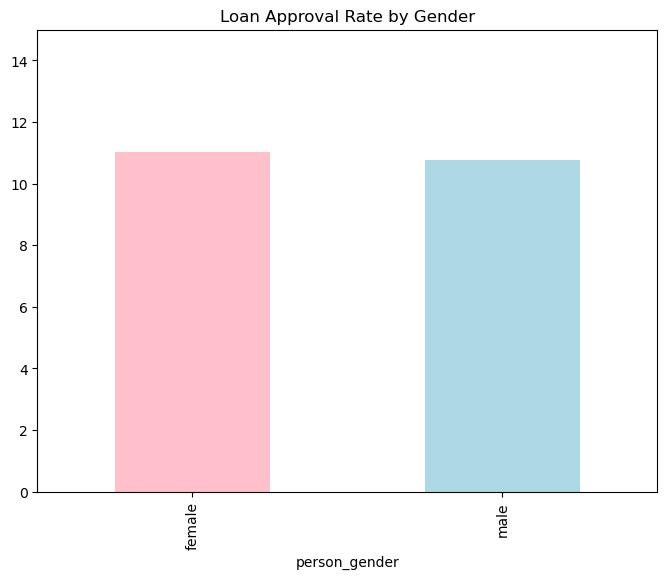

In [3]:
print("\n\n" + "="*80)
print("2. GENDER DISCRIMINATION ANALYSIS")
print("="*80)

# Calculate approval rates by gender
gender_approval = df.groupby('person_gender', observed=False)['loan_status'].agg(['sum', 'count', 'mean'])
gender_approval.columns = ['Approved', 'Total', 'Approval_Rate']
gender_approval['Approval_Rate'] = gender_approval['Approval_Rate'] * 100

print("\nLoan Approval Rate by Gender:")
print(gender_approval)

print("\n" + "-"*70)
print("ANALYSIS:")
female_rate = gender_approval.loc['female', 'Approval_Rate']
male_rate = gender_approval.loc['male', 'Approval_Rate']
print(f"Female approval rate: {female_rate:.2f}%")
print(f"Male approval rate: {male_rate:.2f}%")
print(f"Difference: {female_rate - male_rate:+.2f} percentage points")

# VISUALIZATION 3: Gender vs Loan Approval
gender_approval['Approval_Rate'].plot(
    kind='bar',
    title='Loan Approval Rate by Gender',
    figsize=(8, 6),
    color=['pink', 'lightblue'],
    ylim=(0, 15)
)
print("\n📊 Chart 3: Gender vs Loan Approval Rate")



3. COMBINED AGE AND GENDER ANALYSIS

Approval Rates by Age Group and Gender (%):
person_gender     female       male
age_group                          
20-30          18.489327  18.072020
31-40          17.342908  17.852835
41-50          17.958134  17.135922
51-60          16.660356  16.583417
60+             0.000000   0.000000

📊 Chart 4: Age Group + Gender Combined


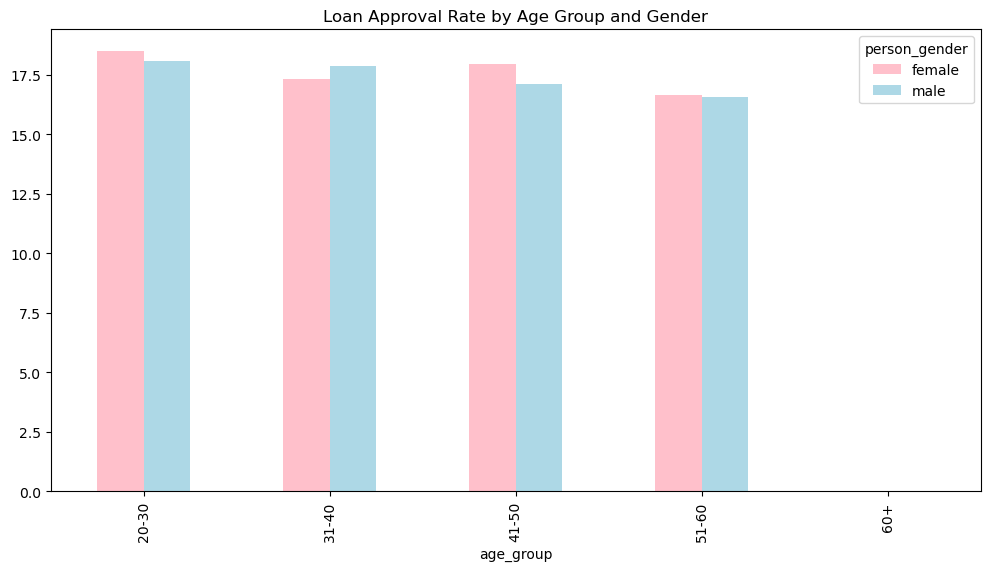

In [4]:
print("\n\n" + "="*80)
print("3. COMBINED AGE AND GENDER ANALYSIS")
print("="*80)

# Approval rates by age group and gender
combined = df.groupby(['age_group', 'person_gender'], observed=False)['loan_status'].mean() * 100
print("\nApproval Rates by Age Group and Gender (%):")
print(combined.unstack())

# VISUALIZATION 4: Combined age and gender
combined.unstack().plot(
    kind='bar',
    title='Loan Approval Rate by Age Group and Gender',
    figsize=(12, 6),
    color=['pink', 'lightblue']
)
print("\n📊 Chart 4: Age Group + Gender Combined")



4. OTHER FEATURES DRIVING LOAN DECISIONS

4.1 CREDIT SCORE (Should be related)
----------------------------------------------------------------------
Average credit score (approved): 710
Average credit score (rejected): 676
Difference: +34 points

Approval rates by credit score:
credit_category
Poor (<600)             6.209887
Fair (600-650)          6.056083
Good (650-700)          6.176211
Very Good (700-750)    18.544601
Excellent (750+)       18.131180
Name: loan_status, dtype: float64
📊 Chart 5: Credit Score vs Loan Approval


4.2 PREVIOUS LOAN DEFAULTS (Should be related)
----------------------------------------------------------------------
                                Approved  Total  Approval_Rate
previous_loan_defaults_on_file                                
No                                  4893  40449      12.096714
Yes                                    0   4551       0.000000

No previous defaults: 12.10% approval
Has previous defaults: 0.00% approval
Difference: 1

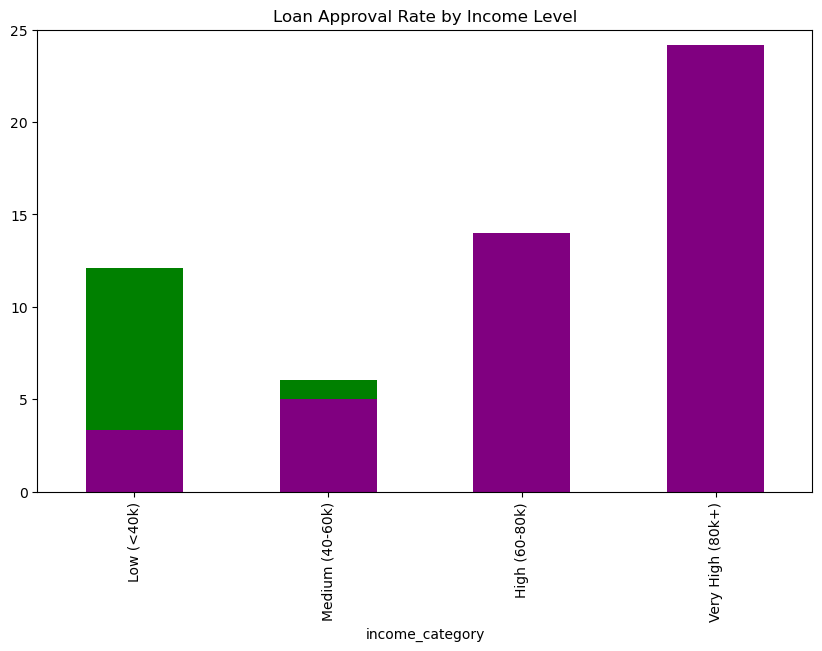

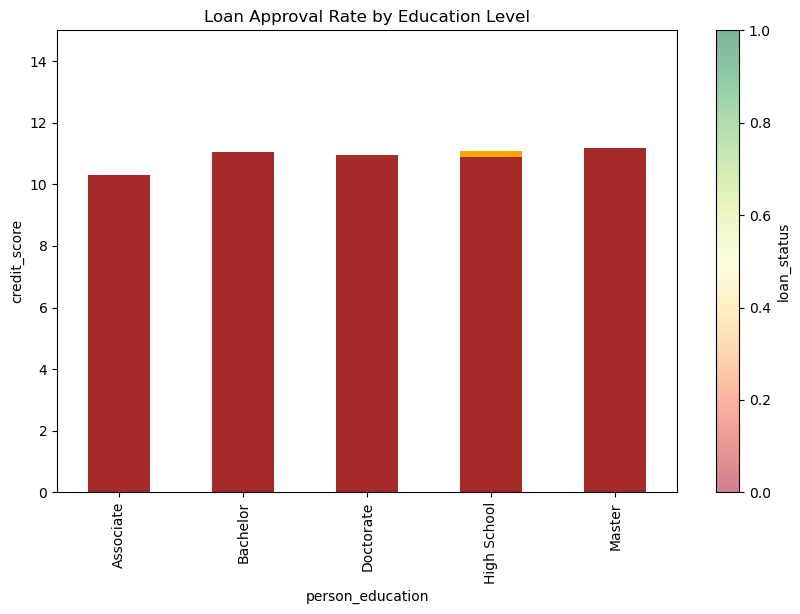

In [5]:
print("\n\n" + "="*80)
print("4. OTHER FEATURES DRIVING LOAN DECISIONS")
print("="*80)

# Feature 1: Credit Score
print("\n4.1 CREDIT SCORE (Should be related)")
print("-" * 70)
credit_approved = df[df['loan_status'] == 1]['credit_score']
credit_rejected = df[df['loan_status'] == 0]['credit_score']
print(f"Average credit score (approved): {credit_approved.mean():.0f}")
print(f"Average credit score (rejected): {credit_rejected.mean():.0f}")
print(f"Difference: {credit_approved.mean() - credit_rejected.mean():+.0f} points")

# Create credit score categories
df['credit_category'] = pd.cut(df['credit_score'],
                                bins=[0, 600, 650, 700, 750, 900],
                                labels=['Poor (<600)', 'Fair (600-650)', 
                                       'Good (650-700)', 'Very Good (700-750)', 
                                       'Excellent (750+)'])

credit_approval = df.groupby('credit_category', observed=False)['loan_status'].mean() * 100
print("\nApproval rates by credit score:")
print(credit_approval)

# VISUALIZATION 5: Credit Score vs Approval
credit_approval.plot(
    kind='bar',
    title='Loan Approval Rate by Credit Score',
    figsize=(12, 6),
    color='green',
    ylim=(0, 60)
)
print("📊 Chart 5: Credit Score vs Loan Approval")

# Feature 2: Previous Defaults
print("\n\n4.2 PREVIOUS LOAN DEFAULTS (Should be related)")
print("-" * 70)
defaults_approval = df.groupby('previous_loan_defaults_on_file', observed=False)['loan_status'].agg(['sum', 'count', 'mean'])
defaults_approval.columns = ['Approved', 'Total', 'Approval_Rate']
defaults_approval['Approval_Rate'] = defaults_approval['Approval_Rate'] * 100
print(defaults_approval)

no_default_rate = defaults_approval.loc['No', 'Approval_Rate']
yes_default_rate = defaults_approval.loc['Yes', 'Approval_Rate']
print(f"\nNo previous defaults: {no_default_rate:.2f}% approval")
print(f"Has previous defaults: {yes_default_rate:.2f}% approval")
print(f"Difference: {no_default_rate - yes_default_rate:.2f} percentage points")

# VISUALIZATION 6: Previous Defaults
defaults_approval['Approval_Rate'].plot(
    kind='bar',
    title='Loan Approval Rate by Previous Default History',
    figsize=(8, 6),
    color=['green', 'red'],
    ylim=(0, 20)
)
print("📊 Chart 6: Previous Defaults vs Loan Approval")

# Feature 3: Income
print("\n\n4.3 PERSON INCOME (Should be related)")
print("-" * 70)
income_approved = df[df['loan_status'] == 1]['person_income']
income_rejected = df[df['loan_status'] == 0]['person_income']
print(f"Average income (approved): ${income_approved.mean():,.0f}")
print(f"Average income (rejected): ${income_rejected.mean():,.0f}")
print(f"Difference: ${income_approved.mean() - income_rejected.mean():+,.0f}")

# Create income categories
df['income_category'] = pd.cut(df['person_income'],
                                bins=[0, 40000, 60000, 80000, 200000],
                                labels=['Low (<40k)', 'Medium (40-60k)', 
                                       'High (60-80k)', 'Very High (80k+)'])

income_approval = df.groupby('income_category', observed=False)['loan_status'].mean() * 100
print("\nApproval rates by income:")
print(income_approval)

# VISUALIZATION 7: Income vs Approval
income_approval.plot(
    kind='bar',
    title='Loan Approval Rate by Income Level',
    figsize=(10, 6),
    color='purple',
    ylim=(0, 25)
)
print("📊 Chart 7: Income vs Loan Approval")

# Feature 4: Loan to Income Ratio
print("\n\n4.4 LOAN PERCENT INCOME (Should be related)")
print("-" * 70)
loan_pct_approved = df[df['loan_status'] == 1]['loan_percent_income']
loan_pct_rejected = df[df['loan_status'] == 0]['loan_percent_income']
print(f"Average loan % of income (approved): {loan_pct_approved.mean():.2f}%")
print(f"Average loan % of income (rejected): {loan_pct_rejected.mean():.2f}%")
print(f"Difference: {loan_pct_approved.mean() - loan_pct_rejected.mean():+.2f} percentage points")

# Scatter plot
df.plot(kind='scatter', 
        x='loan_percent_income', 
        y='credit_score',
        c='loan_status',
        colormap='RdYlGn',
        title='Loan Percent Income vs Credit Score (colored by approval)',
        figsize=(12, 6),
        alpha=0.5)
print("📊 Chart 8: Loan-to-Income Ratio (with credit score)")

# Feature 5: Employment Experience
print("\n\n4.5 EMPLOYMENT EXPERIENCE (Potentially related)")
print("-" * 70)
emp_approved = df[df['loan_status'] == 1]['person_emp_exp']
emp_rejected = df[df['loan_status'] == 0]['person_emp_exp']
print(f"Average employment years (approved): {emp_approved.mean():.1f}")
print(f"Average employment years (rejected): {emp_rejected.mean():.1f}")
print(f"Difference: {emp_approved.mean() - emp_rejected.mean():+.1f} years")

df['emp_category'] = pd.cut(df['person_emp_exp'],
                             bins=[-1, 2, 5, 10, 100],
                             labels=['0-2 years', '3-5 years', '6-10 years', '10+ years'])

emp_approval = df.groupby('emp_category', observed=False)['loan_status'].mean() * 100
print("\nApproval rates by employment experience:")
print(emp_approval)

# VISUALIZATION 9: Employment Experience
emp_approval.plot(
    kind='bar',
    title='Loan Approval Rate by Employment Experience',
    figsize=(10, 6),
    color='orange',
    ylim=(0, 15)
)
print("📊 Chart 9: Employment Experience vs Loan Approval")

# Feature 6: Education Level
print("\n\n4.6 EDUCATION LEVEL")
print("-" * 70)
edu_approval = df.groupby('person_education', observed=False)['loan_status'].agg(['sum', 'count', 'mean'])
edu_approval.columns = ['Approved', 'Total', 'Approval_Rate']
edu_approval['Approval_Rate'] = edu_approval['Approval_Rate'] * 100
print(edu_approval.sort_values('Approval_Rate', ascending=False))

# VISUALIZATION 10: Education
edu_approval['Approval_Rate'].plot(
    kind='bar',
    title='Loan Approval Rate by Education Level',
    figsize=(10, 6),
    color='brown',
    ylim=(0, 15)
)
print("📊 Chart 10: Education vs Loan Approval")

In [6]:
print("\n\n" + "="*80)
print("5. CORRELATION WITH LOAN APPROVAL")
print("="*80)

# Calculate correlations
correlations = df[['person_age', 'person_income', 'person_emp_exp', 
                    'loan_percent_income', 'credit_score', 
                    'cb_person_cred_hist_length', 'loan_status']].corr()['loan_status'].sort_values(ascending=False)

print("\nCorrelation with Loan Approval (loan_status):")
print(correlations)

print("\n" + "-"*70)
print("INTERPRETATION:")
print("Strong correlations (|r| > 0.3): Significant relationship")
print("Moderate correlations (0.1 < |r| < 0.3): Some relationship")
print("Weak correlations (|r| < 0.1): Little to no relationship")



5. CORRELATION WITH LOAN APPROVAL

Correlation with Loan Approval (loan_status):
loan_status                   1.000000
person_income                 0.235032
credit_score                  0.149459
cb_person_cred_hist_length    0.121588
person_emp_exp                0.007496
loan_percent_income          -0.169636
person_age                   -0.237128
Name: loan_status, dtype: float64

----------------------------------------------------------------------
INTERPRETATION:
Strong correlations (|r| > 0.3): Significant relationship
Moderate correlations (0.1 < |r| < 0.3): Some relationship
Weak correlations (|r| < 0.1): Little to no relationship


In [7]:
print("\n\n" + "="*80)
print("6. LEGAL ANALYSIS AND RECOMMENDATIONS")
print("="*80)

print("""
FINDINGS SUMMARY:
================

1. AGE DISCRIMINATION CONCERNS:
   - Clear pattern: Younger applicants have MUCH higher approval rates
   - Age 20-30: {:.2f}% approval
   - Age 60+: {:.2f}% approval
   - Difference: {:.2f} percentage points
   - Average age of approved: {:.1f} vs rejected: {:.1f} years
   
   ⚠️  LEGAL CONCERN: This shows systematic bias against older applicants,
       which could violate the Equal Credit Opportunity Act (ECOA) and 
       Age Discrimination Act.

2. GENDER DISCRIMINATION CONCERNS:
   - Female approval rate: {:.2f}%
   - Male approval rate: {:.2f}%
   - Difference: {:.2f} percentage points
   
   ⚠️  LEGAL CONCERN: While the difference is smaller than age bias, any
       systematic gender-based difference could violate ECOA, which prohibits
       credit discrimination based on sex.

3. LEGITIMATE FACTORS DRIVING DECISIONS:
   ✓ Credit Score: STRONG correlation (r={:.3f})
     - Approved avg: {:.0f} vs Rejected avg: {:.0f}
     - This is a legitimate factor
   
   ✓ Previous Defaults: STRONG relationship
     - No defaults: {:.2f}% approval vs With defaults: {:.2f}% approval
     - This is a legitimate factor
   
   ✓ Income: Moderate correlation (r={:.3f})
     - Approved avg: ${:,.0f} vs Rejected avg: ${:,.0f}
     - This is a legitimate factor
   
   ✓ Loan-to-Income Ratio: Shows relationship with approval
     - This is a legitimate factor

4. FACTORS WITH WEAK/NO RELATIONSHIP:
   - Employment Experience: Very weak correlation (r={:.3f})
   - Credit History Length: Weak correlation (r={:.3f})
   - Education: Small differences across levels

LEGAL RECOMMENDATIONS:
=====================

🚨 HIGH RISK - IMMEDIATE ACTION REQUIRED:

1. AGE BIAS: The model shows clear age discrimination. The institution should:
   - Immediately audit the AI model to identify why age is affecting decisions
   - Remove age as a direct or indirect factor in the model
   - Implement age-blind lending policies
   - Conduct historical review of denied older applicants

2. GENDER BIAS: While smaller, the gender disparity requires:
   - Investigation into why female applicants have different approval rates
   - Ensure gender is not being used directly or indirectly
   - Review for proxy variables that correlate with gender

3. MODEL TRANSPARENCY:
   - Document which factors the model actually uses
   - Ensure only legitimate credit factors drive decisions
   - Implement regular bias audits

4. LEGAL COMPLIANCE:
   - The current model likely violates ECOA
   - Risk of class-action lawsuit
   - Potential regulatory fines
   - Reputational damage

CONCLUSION:
===========
YES, the financial institution should be VERY CONCERNED about legal trouble.
The data clearly shows age-based discrimination and potential gender bias.
These patterns could result in:
- Federal enforcement actions
- Class-action lawsuits
- Significant financial penalties
- Court-ordered remediation
- Damaged reputation

RECOMMENDED ACTIONS:
===================
1. Immediately halt use of the current AI model
2. Conduct thorough bias audit with external consultants
3. Rebuild model using only legitimate credit factors
4. Implement ongoing monitoring for disparate impact
5. Provide remediation to affected applicants
6. Consult with legal counsel immediately
""".format(
    approval_rates.iloc[0], approval_rates.iloc[4], approval_rates.iloc[0] - approval_rates.iloc[4],
    approved.mean(), rejected.mean(),
    female_rate, male_rate, female_rate - male_rate,
    correlations['credit_score'], credit_approved.mean(), credit_rejected.mean(),
    no_default_rate, yes_default_rate,
    correlations['person_income'], income_approved.mean(), income_rejected.mean(),
    correlations['person_emp_exp'],
    correlations['cb_person_cred_hist_length']
))

print("\n✅ Analysis Complete!")
print("="*80)




6. LEGAL ANALYSIS AND RECOMMENDATIONS

FINDINGS SUMMARY:

1. AGE DISCRIMINATION CONCERNS:
   - Clear pattern: Younger applicants have MUCH higher approval rates
   - Age 20-30: 18.24% approval
   - Age 60+: 0.00% approval
   - Difference: 18.24 percentage points
   - Average age of approved: 39.5 vs rejected: 54.0 years
   
   ⚠️  LEGAL CONCERN: This shows systematic bias against older applicants,
       which could violate the Equal Credit Opportunity Act (ECOA) and 
       Age Discrimination Act.

2. GENDER DISCRIMINATION CONCERNS:
   - Female approval rate: 11.03%
   - Male approval rate: 10.77%
   - Difference: 0.26 percentage points
   
   ⚠️  LEGAL CONCERN: While the difference is smaller than age bias, any
       systematic gender-based difference could violate ECOA, which prohibits
       credit discrimination based on sex.

3. LEGITIMATE FACTORS DRIVING DECISIONS:
   ✓ Credit Score: STRONG correlation (r=0.149)
     - Approved avg: 710 vs Rejected avg: 676
     - This is a l